In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [3]:
import pandas as pd
uxy=pd.read_csv('t.csv')

In [4]:
uxy.head()

,Unnamed: 0,x,y
0,0,12.995293,77.602585
1,1,12.995293,77.602585
2,2,12.935676,77.625145
3,3,12.937138,77.619545
4,4,12.935614,77.625122


In [5]:
X=np.array(uxy[['x','y']])
print(len(X[:,1]))

84


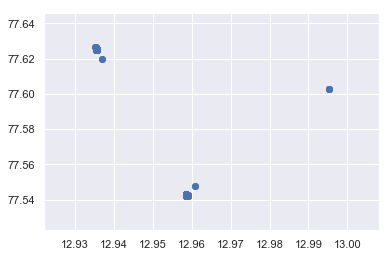

In [6]:
plt.scatter(X[:,0], X[:,1]);
plt.show()

best k 3


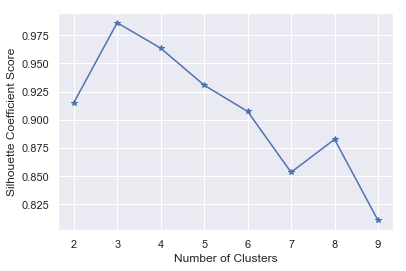

In [9]:
from sklearn.metrics import silhouette_score
import numpy as np
clusters = range(2,10)
def find_best_k(X):
    sc_scores = []
    score_indexes = []
    for t in clusters:   
        kmeans = KMeans(n_clusters=t).fit(X)
        sc_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
        sc_scores.append(sc_score)
        score_indexes.append({'s':sc_score,'k':t})
    #np.argmax 返回list 最大的第一个元素的index    
    best_k = score_indexes[np.argmax(sc_scores)]['k']
    print('best k',best_k )
    return best_k, sc_scores
def plot_sic(sc_scores):
    plt.figure()
    plt.plot(clusters, sc_scores, '*-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient Score')
    plt.show()
k,sc_scores = find_best_k(X)
plot_sic(sc_scores)

In [10]:
k_means = KMeans(init = "k-means++", n_clusters = k) # also can set to 3
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[12.95889813, 77.54289713],
       [12.93565288, 77.62497768],
       [12.995293  , 77.602585  ]])

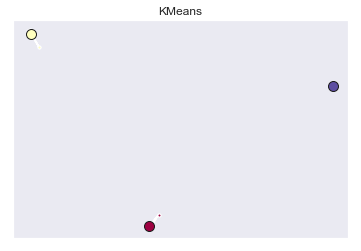

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()